# **Assignment No - 1**



---

**Name** - Vaishnavi Krishnat Phalle .
**Roll No** - EN23107096 .
**Class** - TY(B) .
**Batch** - A .

---
**Title** - Identify a real-world problem in a specific industry (e.g., Agriculture, Healthcare, Finance,
Education, or Retail) and propose an AI-driven solution. Outline the problem statement, AI
methodology, expected impact, and feasibility of implementation.


### **Real-time use case - Healthcare**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('diabetes.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


#### **1) Logistic model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = df.drop(['Pregnancies','SkinThickness','Insulin','DiabetesPedigreeFunction','Outcome'], axis=1)
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=42)

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy:.2f}")

Accuracy of the Logistic Regression model: 0.76


In [ ]:
reoprt = classification_report(y_test, y_pred)
print("Classification Report:")
print(reoprt)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
Predicted   0   1
Actual           
0          82  17
1          20  35


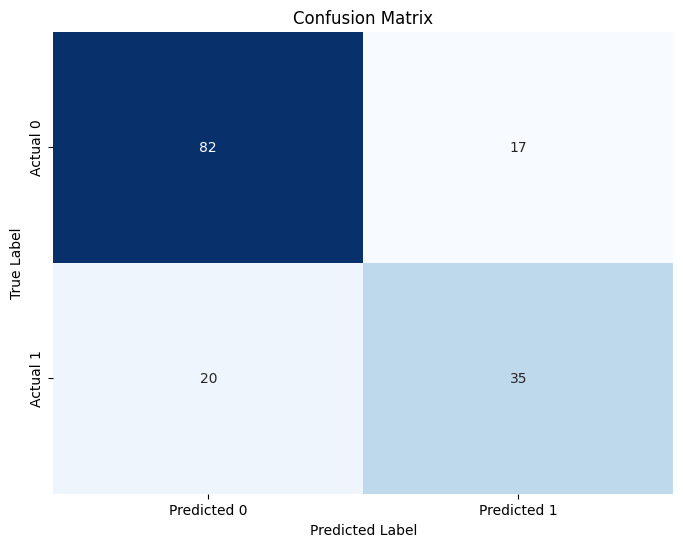

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

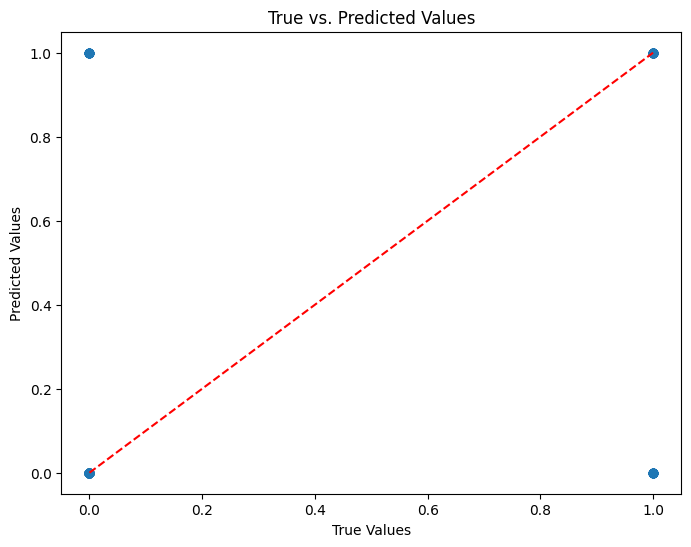

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()

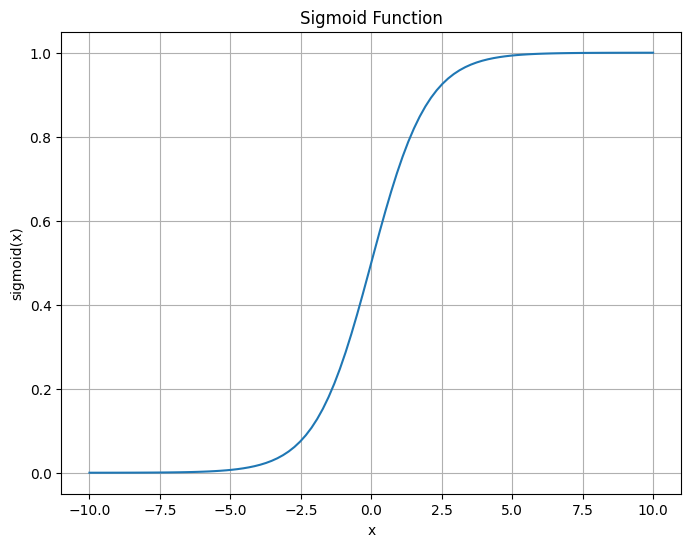

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_values = np.linspace(-10, 10, 100)
y_values = sigmoid(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.show()

#### **2) Naive bayes model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = model.predict(X_test)

In [ ]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy of the Naive Bayes model: {accuracy_nb:.2f}")

Accuracy of the Naive Bayes model: 0.73


In [ ]:
report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report for Naive Bayes:")
print(report_nb)

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [ ]:
confusion_matrix_nb = pd.crosstab(y_test, y_pred_nb, rownames=['Actual'], colnames=['Predicted'])
print("Confusion Matrix for Naive Bayes:")
print(confusion_matrix_nb)

Confusion Matrix for Naive Bayes:
Predicted   0   1
Actual           
0          78  21
1          21  34


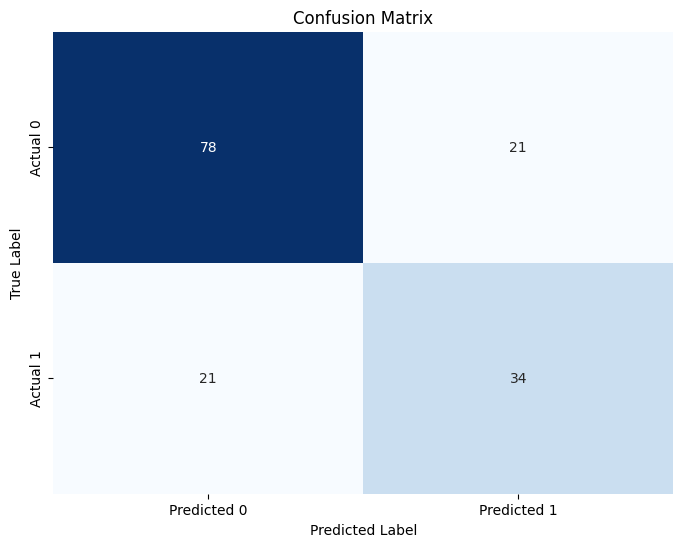

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_nb, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

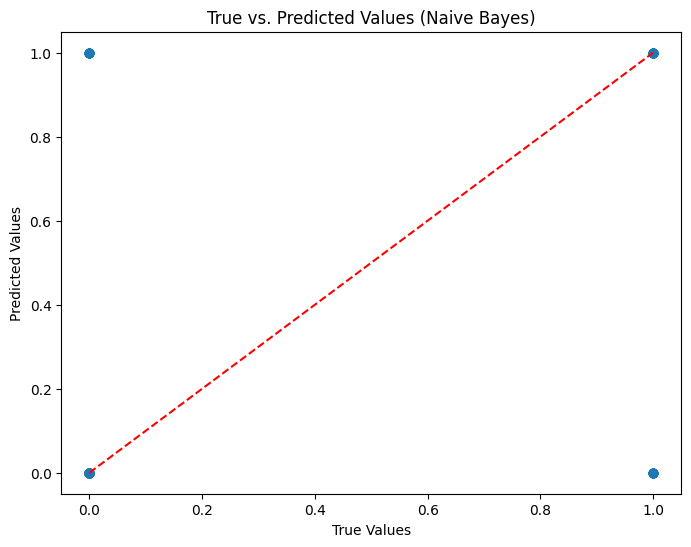

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nb)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values (Naive Bayes)')
plt.show()

#### **Comparison of models -**

In [ ]:
data = {
    'Metric': ['Accuracy', 'Accuracy'],
    'Value': [accuracy, accuracy_nb],
    'Model': ['Logistic Regression', 'Naive Bayes']
}
df_metrics = pd.DataFrame(data)

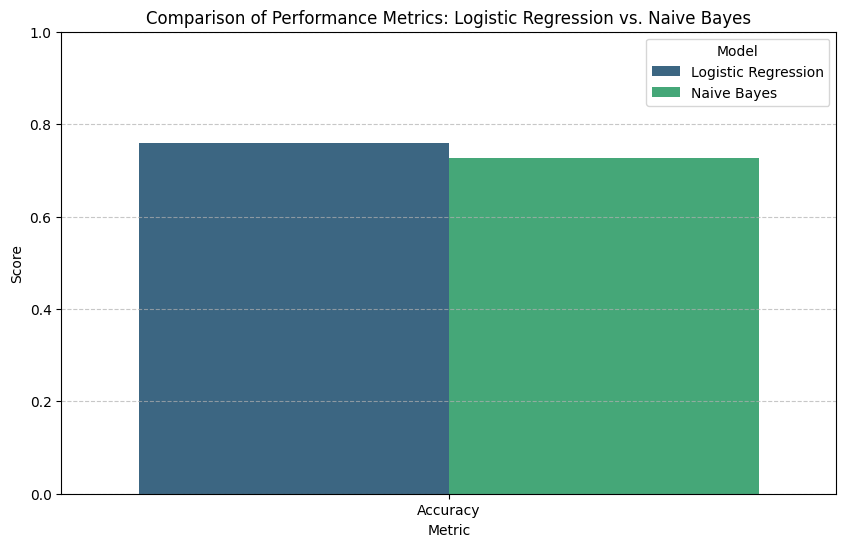

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=df_metrics, palette='viridis')
plt.title('Comparison of Performance Metrics: Logistic Regression vs. Naive Bayes')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()